In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
training_set_labels=pd.read_csv('training_set_labels.csv')
training_set_values=pd.read_csv('traning_set_values.csv') 


Train_data = pd.merge(training_set_values, training_set_labels, on='id')



In [15]:
from sklearn.model_selection import train_test_split

Train_data
Train_data = Train_data.select_dtypes(include=[np.number])
Train_data['status_group'] = training_set_labels['status_group']

Train_data_sample = Train_data.sample(frac=1, random_state=1)


# Split the data into train and test sets

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset
train_x, test_x, train_y, test_y = train_test_split(
    Train_data_sample.drop(['status_group'], axis=1),
    Train_data_sample['status_group'],
    test_size=0.3,
    random_state=42
)

# Standardize the features
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)  # Fit on train data and transform it
test_x = scaler.transform(test_x)        # Transform test data (using same scaler)

# Define neighbors list
knn_neighbours = list(range(1, 150, 2))

# Lists to store metrics for each k
precision_list = []
recall_list = []
f1_score_list = []
accuracy_list = []

for k in knn_neighbours:
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    prediction = knn.predict(test_x)
    
    # Compute confusion matrix
    cm = confusion_matrix(test_y, prediction)
    #print(cm)
    # Compute per-class metrics
    per_class_precision = []
    per_class_recall = []
    per_class_f1 = []

    for i in range(cm.shape[0]):  # Iterate over classes
        TP = cm[i, i]
        FP = np.sum(cm[:, i]) - TP
        FN = np.sum(cm[i, :]) - TP
        TN = np.sum(cm) - (TP + FP + FN)  # Total samples minus other counts
        
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        per_class_precision.append(precision)
        per_class_recall.append(recall)
        per_class_f1.append(f1_score)

    # Compute macro-averaged metrics (to summarize multi-class results)
    precision_list.append(np.mean(per_class_precision))
    recall_list.append(np.mean(per_class_recall))
    f1_score_list.append(np.mean(per_class_f1))
    accuracy_list.append(np.trace(cm) / np.sum(cm))  # Accuracy = (sum of diagonal / total)




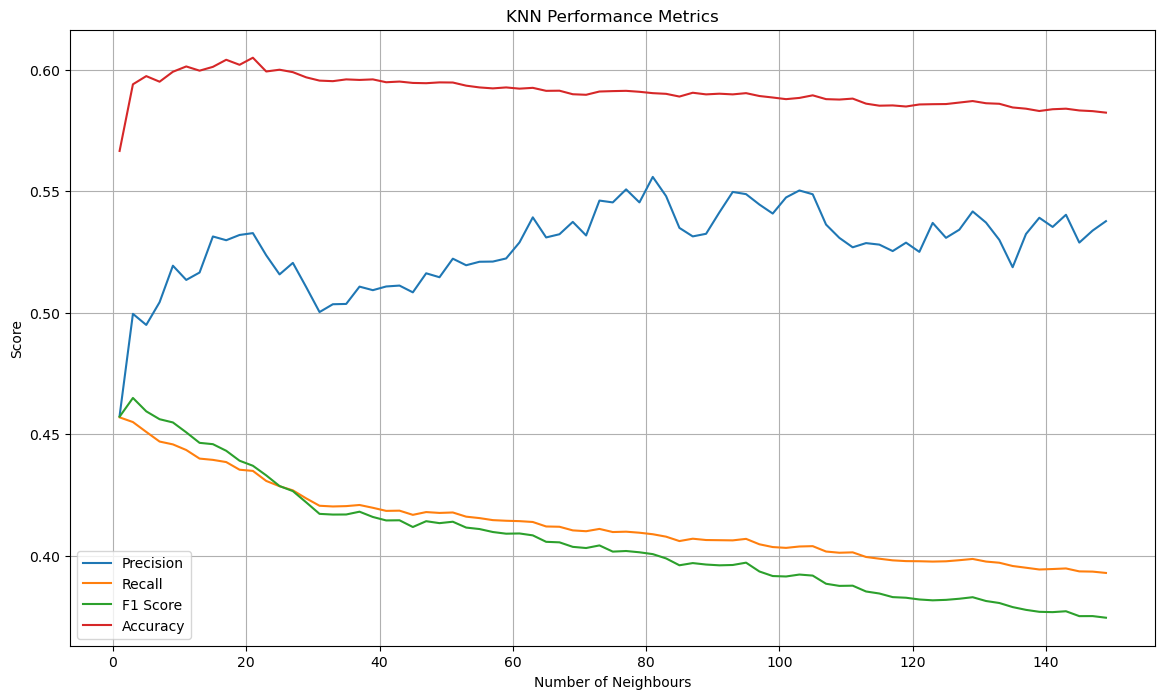

In [6]:
# Plot the various metrics
plt.figure(figsize=(14, 8))
plt.plot(knn_neighbours, precision_list, label='Precision')
plt.plot(knn_neighbours, recall_list, label='Recall')
plt.plot(knn_neighbours, f1_score_list, label='F1 Score')
plt.plot(knn_neighbours, accuracy_list, label='Accuracy')
plt.xlabel('Number of Neighbours')
plt.ylabel('Score')
plt.title('KNN Performance Metrics')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
test_df = pd.read_csv("test_set_values.csv")
X_test = test_df.drop(columns=['id'])

# Train KNN with k=22
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(train_x, train_y)

# Predict
preds_encoded = knn.predict(X_test)

# Decode predicted labels back to original
preds = le.inverse_transform(preds_encoded)

# Prepare submission DataFrame
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'status_group': preds
})

# Save to CSV
submission_df.to_csv("submission.csv", index=False)


C:\Users\Nik\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: '2013-02-04'

In [19]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Load test data
test_df = pd.read_csv("test_set_values.csv")

# Keep only numerical columns for test data
X_test = test_df.select_dtypes(include=[np.number])

# Load training data and labels (from your setup)
Train_data = Train_data.select_dtypes(include=[np.number])
Train_data['status_group'] = training_set_labels['status_group']

# Shuffle the training data
Train_data_sample = Train_data.sample(frac=1, random_state=1)

# Split into features and labels
X_train = Train_data_sample.drop(columns=['status_group'])
y_train = Train_data_sample['status_group']

# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Train KNN with k=22
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train_encoded)

# Predict on test data
preds_encoded = knn.predict(X_test)
preds = le.inverse_transform(preds_encoded)

# Output dataframe
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'status_group': preds
})

# Save to CSV
submission_df.to_csv("submission.csv", index=False)
print("✅ Predictions saved to submission.csv")


✅ Predictions saved to submission.csv


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_encoded)

# Predict on test data
preds_encoded = rf.predict(X_test)
preds = le.inverse_transform(preds_encoded)

# Create submission file
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'status_group': preds
})
submission_df.to_csv("submissionrf.csv", index=False)

print("🌲 Random Forest model done! Output saved as submission.csv.")

🌲 Random Forest model done! Output saved as submission.csv.


In [22]:
X = Train_data_sample.drop(columns=['status_group'])
y = Train_data_sample['status_group']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on validation set
val_preds = rf.predict(X_val)

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [25]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN (k=22)": KNeighborsClassifier(n_neighbors=22),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "MLP (Neural Net)": MLPClassifier(max_iter=300)
}

# Evaluate each classifier
results = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_val)
    acc = accuracy_score(y_val, preds)
    results.append((name, acc))

# Sort and display results
results.sort(key=lambda x: x[1], reverse=True)
print("\n🏆 Classification Accuracy Leaderboard:")
for name, acc in results:
    print(f"{name:25s}: {acc:.4f}")

C:\Users\Nik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🏆 Classification Accuracy Leaderboard:
Random Forest            : 0.7087
Decision Tree            : 0.6419
Logistic Regression      : 0.5468
SVM                      : 0.5421
KNN (k=22)               : 0.5332
MLP (Neural Net)         : 0.5113
Naive Bayes              : 0.4811


# don't consdier the code below

---

In [ ]:
df= pd.read_csv('traning_set_values.csv')

### Giving raininess score to the data set using the date_reorded column


In [ ]:

# Convert date_recorded to datetime format
df["date_recorded"] = pd.to_datetime(df["date_recorded"])

# Define a function to map each month to its ordinal value
def assign_raininess(month):
    if month in [3, 4, 5]:  # March-May (Long Rains)
        return 4
    elif month in [10, 11, 12]:  # October-December (Short Rains)
        return 3
    elif month in [1, 2]:  # January-February (Short Dry)
        return 2
    else:  # June-September (Main Dry)
        return 1

# Apply the function to create a new column
df["raininess_score"] = df["date_recorded"].dt.month.apply(assign_raininess)



### removing duplicate columns based on EDA
## MLPR 25 Discussion 

In [ ]:
crossed_out_columns = ['wpt_name', 'extraction_type', 'source', 'water_quality', 'waterpoint_type', 'payment_type', 'quality', 'recorded_by','date_recorded']

df_cleaned = df.drop(columns=[col for col in crossed_out_columns if col in df.columns])



In [24]:
df_cleaned.shape

(59400, 33)

---

### imputation and for unknow in the quantity_group column

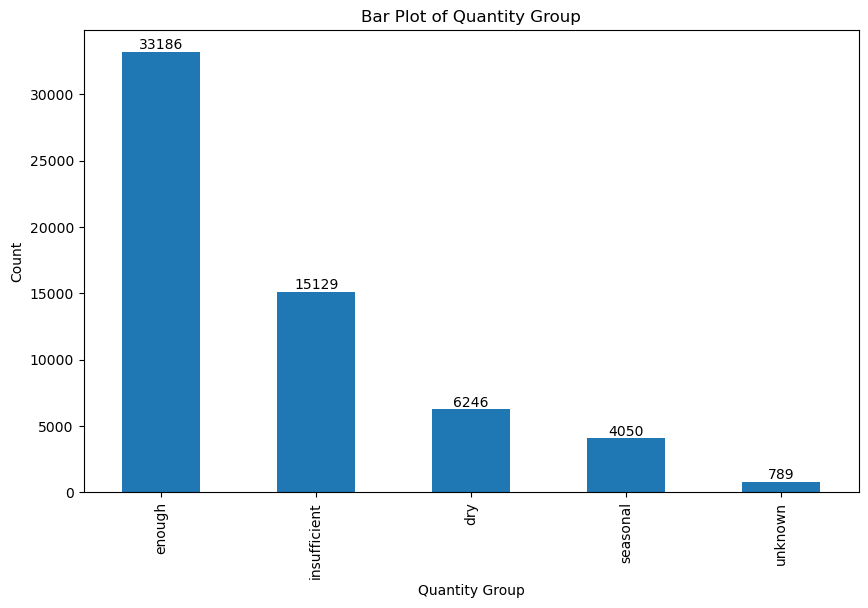

In [28]:
ax = df['quantity_group'].value_counts().plot(kind='bar', figsize=(10, 6))

# Annotate the bars with their respective values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Quantity Group')
plt.ylabel('Count')
plt.title('Bar Plot of Quantity Group')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import numpy as np

# Replace 'unknown' in quantity_group with NaN
df_cleaned['quantity_group'] = df_cleaned['quantity_group'].replace('unknown', np.nan)

# Filter rows with known and unknown quantity_group
known_data = df_cleaned[df_cleaned['quantity_group'].notna()]
unknown_data = df_cleaned[df_cleaned['quantity_group'].isna()]

# Select numeric columns as independent variables
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Prepare training data
X = known_data[numeric_columns]
y = known_data['quantity_group']

# Split the known data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=y.unique()))

# Predict the quantity_group for unknown data
unknown_data['quantity_group'] = rf.predict(unknown_data[numeric_columns])

# Combine the known and imputed data
df_cleaned = pd.concat([known_data, unknown_data])


              precision    recall  f1-score   support

      enough       0.68      0.58      0.63      1876
insufficient       0.81      0.89      0.85      9977
         dry       0.74      0.67      0.70      4559
    seasonal       0.61      0.45      0.52      1172

    accuracy                           0.77     17584
   macro avg       0.71      0.65      0.68     17584
weighted avg       0.76      0.77      0.76     17584



C:\Users\Admin\AppData\Local\Temp\ipykernel_29396\3005238162.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_data['quantity_group'] = rf.predict(unknown_data[numeric_columns])


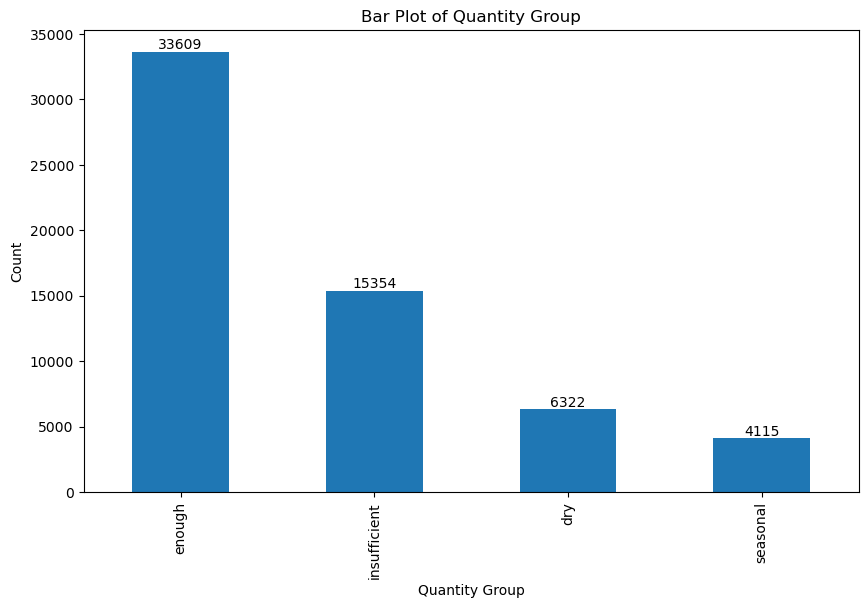

In [35]:
ax = df_cleaned['quantity_group'].value_counts().plot(kind='bar', figsize=(10, 6))

# Annotate the bars with their respective values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Quantity Group')
plt.ylabel('Count')
plt.title('Bar Plot of Quantity Group')
plt.show()

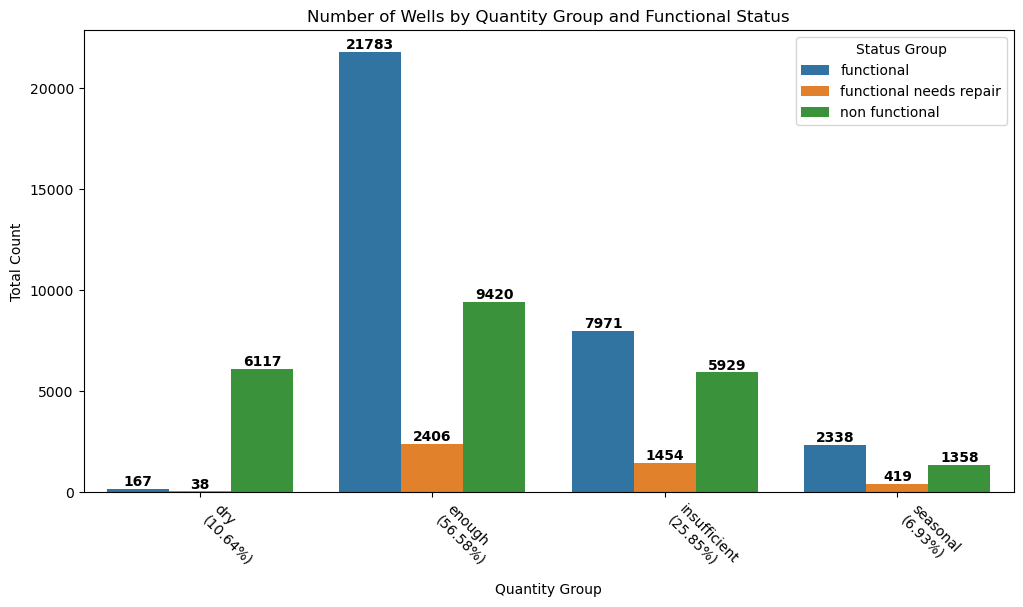

In [40]:



import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Merge train_set with values_df to include 'status_group'
merged_df = df_cleaned.merge(training_set_labels, on="id", how="left")

# Compute total wells
total_wells = len(merged_df)

# Compute missing values in 'quantity_group'
missing_values = merged_df["quantity_group"].isna().sum()
missing_percentage = (missing_values / total_wells) * 100

# Group by 'quantity_group' and 'status_group', then count occurrences
df = merged_df.groupby(["quantity_group", "status_group"]).size().reset_index(name="total")

# Compute overall counts for each quantity group
quantity_group_totals = df.groupby("quantity_group")["total"].sum().reset_index()
quantity_group_totals["percentage"] = (quantity_group_totals["total"] / total_wells) * 100

# Create a mapping for 'quantity_group' -> percentage
quantity_group_percentage_dict = dict(zip(quantity_group_totals["quantity_group"], quantity_group_totals["percentage"]))

# Modify x-axis labels to include percentages
x_labels = [
    f"{quantity}\n({quantity_group_percentage_dict[quantity]:.2f}%)"
    for quantity in quantity_group_totals["quantity_group"]
]

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="quantity_group", y="total", hue="status_group")

# Set modified x-axis labels with percentage
ax.set_xticklabels(x_labels, rotation=-45, ha="left")

# Add text labels on bars (handling NaN values)
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # Only annotate if height is not NaN
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Display missing values info in bottom-right corner

# Customize the plot
plt.xlabel("Quantity Group")
plt.ylabel("Total Count")
plt.title("Number of Wells by Quantity Group and Functional Status")
plt.legend(title="Status Group")

# Show the plot
plt.show()


---

# imputation funciton for coulmns with unknown values categorical values

In [ ]:
def plot_and_impute(df, column_name):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    import matplotlib.pyplot as plt
    import numpy as np

    # Replace 'unknown' and NaN with NaN for uniformity
    df[column_name] = df[column_name].replace('unknown', np.nan)

    # Filter rows with known and unknown values
    known_data = df[df[column_name].notna()]
    unknown_data = df[df[column_name].isna()]

    # Select numeric columns as independent variables
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Prepare training data
    X = known_data[numeric_columns]
    y = known_data[column_name]

    # Split the known data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a Random Forest Classifier
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    # Evaluate the model
    y_pred = rf.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=y.unique()))

    # Predict the column values for unknown data
    unknown_data[column_name] = rf.predict(unknown_data[numeric_columns])

    # Combine the known and imputed data
    df_imputed = pd.concat([known_data, unknown_data])

    # Plot the original and imputed distributions side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Original distribution
    ax1 = df[column_name].value_counts().plot(kind='bar', ax=axes[0])
    for p in ax1.patches:
        ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    ax1.set_title(f'Original {column_name} Distribution')
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Count')

    # Imputed distribution
    ax2 = df_imputed[column_name].value_counts().plot(kind='bar', ax=axes[1])
    for p in ax2.patches:
        ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    ax2.set_title(f'Imputed {column_name} Distribution')
    ax2.set_xlabel(column_name)
    ax2.set_ylabel('Count')

    plt.tight_layout()
    plt.show()

    return df_imputed

### this is a unified that will do the processing for of test set values aswell

In [ ]:
def process_dataframe(input_df):
    # Convert date_recorded to datetime format
    input_df["date_recorded"] = pd.to_datetime(input_df["date_recorded"])

    # Define a function to map each month to its ordinal value
    def assign_raininess(month):
        if month in [3, 4, 5]:  # March-May (Long Rains)
            return 4
        elif month in [10, 11, 12]:  # October-December (Short Rains)
            return 3
        elif month in [1, 2]:  # January-February (Short Dry)
            return 2
        else:  # June-September (Main Dry)
            return 1

    # Apply the function to create a new column
    input_df["raininess_score"] = input_df["date_recorded"].dt.month.apply(assign_raininess)

    # Remove unnecessary columns
    redundant_columns = ['wpt_name', 'extraction_type', 'source', 'water_quality', 
                           'waterpoint_type', 'payment_type', 'quality', 'recorded_by'] # these are duplicate columns
    
    removable_columns = ['date_recorded']
    
    crossed_out_columns = redundant_columns + removable_columns

    cleaned_df = input_df.drop(columns=[col for col in crossed_out_columns if col in input_df.columns])


    #date_recorded was removed after doing ordinal encoding.

    return cleaned_df


---